# Modelling Motor Claim Frequency in France

## Getting the data

In [1]:
import pandas as pd
claims = pd.read_csv("/Users/hinaljajal/Downloads/freMTPL2freq.csv")

## Importing libraries 

In [2]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

## Data Cleaning and Processing 

In [3]:
claims.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [4]:
#Checking for missing values 
print(claims.isnull().sum())

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64


In [24]:
#Loading the geojson file representing French regions
france_regions = json.load(open("/Users/hinaljajal/Downloads/regions.geojson", "r"))

The dataframe "claims" has different regions' codes. We encode the region column to contain the regions' names instead. This will make it easier to change any regions according to the new standard set in 2016. 

In [7]:
claims = claims.replace({"R11": "Île-de-France", "R21": "Champagne-Ardenne", 
                         "R22":"Picardie", "R23":"Haute-Normandie",
                         "R24":"Centre","R25":"Basse-Normandie",
                        "R25":"Basse-Normandie","R26":"Bourgogne",
                        "R31":"Nord-Pas-de-Calais","R41":"Lorraine",
                        "R42":"Alsace","R43":"Franche-Comté",
                        "R52":"Pays de la Loire","R53":"Bretagne",
                        "R54":"Poitou-Charentes","R72":"Aquitaine",
                        "R73":"Midi-Pyrénées","R74":"Limousin",
                        "R82":"Rhône-Alpes","R83":"Auvergne",
                        "R91":"Languedoc-Roussillon","R93":"Provence-Alpes-Côte d'Azur",
                        "R94":"Corse"})

Some French regions were combined in 2016, so we change those regions here accordingly.

In [8]:
claims = claims.replace(['Limousin','Aquitaine','Poitou-Charentes'],'Nouvelle-Aquitaine')
claims = claims.replace(['Languedoc-Roussillon','Midi-Pyrénées'],'Occitanie')
claims = claims.replace(['Alsace','Champagne-Ardenne','Lorraine'],'Grand Est')
claims = claims.replace(['Auvergne','Rhône-Alpes'],'Auvergne-Rhône-Alpes')
claims = claims.replace(['Bourgogne','Franche-Comté'],'Bourgogne-Franche-Comté')
claims = claims.replace(['Nord-Pas-de-Calais','Picardie'],'Hauts-de-France')
claims = claims.replace(['Basse-Normandie','Haute-Normandie'],'Normandie')
claims = claims.replace(['Centre'],'Centre-Val de Loire')

Here, we check if the regions in the geojson file correspond with the regions in the dataframe. 

In [27]:
json_regions = []
for i in range(len(france_regions['features'])): 
    json_regions.append(france_regions['features'][i]['properties']['nom'])
#Sort in ascending order to check for equality
json_regions.sort()

In [28]:
#Getting the unique regions in the dataframe and converting it to a list
df_regions = list(set(claims['Region']))
#Sort in ascending order to check for equality
df_regions.sort()
df_regions == json_regions

True

## Data Exploration 

In [30]:
#Calculates the total claims per region
total = claims.groupby('Region')['ClaimNb'].sum().to_numpy()
total

array([5221,  568, 2702, 9204,  247,  904, 1615,  936, 2575, 2235, 2010,
       3907, 3978])

In [32]:
#Creates a dataframe with each region and its corresponding total number of claims
data = {'id':df_regions,
        'Claims':total}
df = pd.DataFrame(data)
df

,id,Claims
0,Auvergne-Rhône-Alpes,5221
1,Bourgogne-Franche-Comté,568
2,Bretagne,2702
3,Centre-Val de Loire,9204
4,Corse,247
5,Grand Est,904
6,Hauts-de-France,1615
7,Normandie,936
8,Nouvelle-Aquitaine,2575
9,Occitanie,2235


In [33]:
#Adds "id" so that we can get the corresponding geospatial feature for each region 
for feature in france_regions["features"]:
    feature["id"] = feature["properties"]["nom"] 

In [34]:
#Creates a choropleth map
fig = px.choropleth(
    df,
    locations="id",
    geojson=france_regions,
    color="Claims",
    title="France Motor Claims"
)

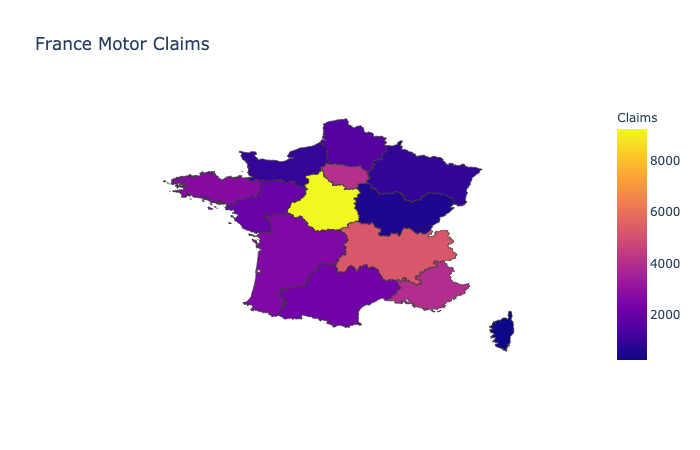

In [35]:
#This line makes sure that the map is produced as a static image (for the purpose of uploading to github as an image)
pio.renderers.default = "png"
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

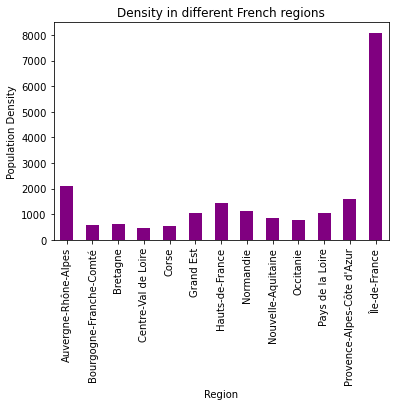

In [40]:
claims_region = claims.groupby('Region')
claims_region.mean()["Density"].plot.bar(color="purple")
plt.ylabel("Population Density"), plt.xlabel("Region"), 
plt.title("Density in different French regions")

plt.show()